# Weibull Parameters of Wind Speeds 2001 to 2010 - 150m above ground level

<https://data.gov.ie/dataset/weibull-parameters-wind-speeds-2001-to-2010-150m-above-ground-level>

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile

import cartopy.crs as ccrs
import contextily as cx
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from src import read_data as rd
import seaborn as sns
from matplotlib_scalebar.scalebar import ScaleBar

from src import functions as fns
from src import read_data as rd

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "weibull-parameters-wind-speeds")

URL = (
    "https://seaiopendata.blob.core.windows.net/wind/"
    "Weibull_150m_params_ITM.zip"
)

FILE_NAME = "Weibull_150m_params_ITM.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [3]:
rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

Data 'Weibull_150m_params_ITM.zip' already exists in 'data/weibull-parameters-wind-speeds'.
Data downloaded on: 2023-12-31 00:18:52.534921+00:00
Download URL: https://seaiopendata.blob.core.windows.net/wind/Weibull_150m_params_ITM.zip
SHA256 hash: d946e0c65417b0dc7325d3cec9c5d71d8bf80225bc85ee788349ad15b92cd767



In [4]:
ZipFile(DATA_FILE).namelist()

['Weibull_150m_c_ITM.cpg',
 'Weibull_150m_c_ITM.dbf',
 'Weibull_150m_c_ITM.prj',
 'Weibull_150m_c_ITM.sbn',
 'Weibull_150m_c_ITM.sbx',
 'Weibull_150m_c_ITM.shp',
 'Weibull_150m_c_ITM.shp.xml',
 'Weibull_150m_c_ITM.shx',
 'Weibull_150m_k_ITM.cpg',
 'Weibull_150m_k_ITM.dbf',
 'Weibull_150m_k_ITM.prj',
 'Weibull_150m_k_ITM.sbn',
 'Weibull_150m_k_ITM.sbx',
 'Weibull_150m_k_ITM.shp',
 'Weibull_150m_k_ITM.shp.xml',
 'Weibull_150m_k_ITM.shx',
 'Weibull_40m_k_ITM.zip']

In [3]:
weibull_c = rd.read_shapefile_from_zip(
    data_path=os.path.join(DATA_FILE), endswith="c_ITM.shp"
)

In [4]:
weibull_k = rd.read_shapefile_from_zip(
    data_path=os.path.join(DATA_FILE), endswith="k_ITM.shp"
)

In [7]:
weibull_c.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
weibull_k.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
weibull_c.shape

(2518, 6)

In [10]:
weibull_k.shape

(353, 6)

In [11]:
weibull_c.columns

Index(['FID_Weibul', 'Value', 'FID_Grid', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [12]:
weibull_k.columns

Index(['FID_Weibul', 'Value', 'FID_Grid', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [13]:
weibull_c.head()

,FID_Weibul,Value,FID_Grid,Shape_Leng,Shape_Area,geometry
0,1,5.9,23,6485.392772,2.628766e+06,"POLYGON ((469500.000 579500.000, 468500.000 57..."
1,2,6.0,23,11430.320784,8.017942e+06,"POLYGON ((470500.000 581500.000, 470500.000 58..."
2,2,6.0,33,8026.363916,2.503502e+06,"POLYGON ((470499.999 581998.183, 468499.999 58..."
3,3,6.1,23,6485.447461,2.628810e+06,"POLYGON ((470500.000 579500.000, 469500.000 57..."
4,3,6.1,34,16233.724878,7.909965e+06,"MULTIPOLYGON (((493500.000 586500.000, 492500...."


In [14]:
weibull_k.head()

,FID_Weibul,Value,FID_Grid,Shape_Leng,Shape_Area,geometry
0,1,1.5,23,31375.956480,5.094710e+07,"POLYGON ((470686.569 561616.211, 471500.000 55..."
1,2,1.6,23,112841.312826,2.875967e+08,"MULTIPOLYGON (((469463.639 582025.159, 470359...."
2,2,1.6,24,61933.596119,1.803478e+08,"POLYGON ((499218.002 555385.132, 501224.182 55..."
3,2,1.6,33,38544.777250,3.352720e+07,"MULTIPOLYGON (((479500.000 596500.000, 477500...."
4,2,1.6,34,23979.626674,1.695664e+07,"MULTIPOLYGON (((490872.910 585937.775, 491500...."


In [5]:
ds, extent = rd.read_dat_file(dat_path=os.path.join("data", "kish-basin"))

In [6]:
xmin, ymin, xmax, ymax = extent.total_bounds

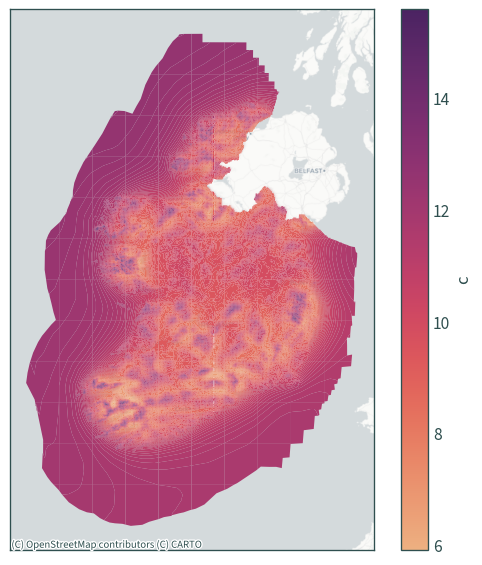

In [7]:
ax = weibull_c.to_crs(3857).plot(
    column="Value",
    cmap="flare",
    figsize=(6, 6),
    legend=True,
    legend_kwds={"label": "c"},
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

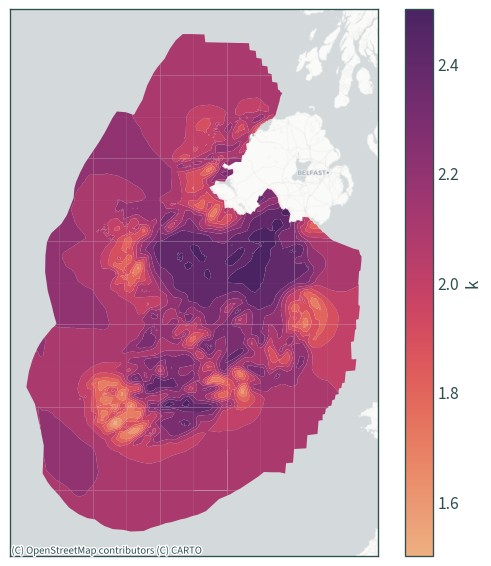

In [8]:
ax = weibull_k.to_crs(3857).plot(
    column="Value",
    cmap="flare",
    figsize=(6, 6),
    legend=True,
    legend_kwds={"label": "k"},
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [9]:
# wind farms in the area
wind_farms = fns.constraint_wind_farm(
    data_path=os.path.join(
        "data",
        "wind-farms-foreshore-process",
        "wind-farms-foreshore-process.zip",
    ),
    dat_extent=extent,
)

In [10]:
# combine Codling wind farm polygons
wind_farms["Name_"] = wind_farms["Name"].str.split(expand=True)[0]

In [11]:
# shape of the halite
shape = rd.halite_shape(dat_xr=ds)

In [12]:
# land boundary
land = rd.read_shapefile_from_zip(
    data_path=os.path.join(
        "data", "boundaries", "osi-provinces-ungeneralised-2019.zip"
    )
)

land = land.dissolve().to_crs(rd.CRS)

In [13]:
# crop to wind farm and basin extent
extent_wf = gpd.GeoDataFrame(
    geometry=(
        gpd.GeoDataFrame(geometry=wind_farms.dissolve().envelope)
        .overlay(gpd.GeoDataFrame(geometry=extent), how="union")
        .dissolve()
        .envelope
    )
)
weibull_c = weibull_c.to_crs(rd.CRS).overlay(extent_wf, how="intersection")
weibull_k = weibull_k.to_crs(rd.CRS).overlay(extent_wf, how="intersection")

In [14]:
# crop land boundary from c and k
weibull_c = weibull_c.overlay(land, how="difference")
weibull_k = weibull_k.overlay(land, how="difference")

In [20]:
def plot_map(df, label):
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.epsg(rd.CRS))

    # add halite boundary - use buffering to smooth the outline
    shape.buffer(1000).buffer(-1000).boundary.plot(
        ax=ax, color="black", linewidth=2
    )

    # wind farms
    colours = ["lime", "lime", "darkslategrey", "deepskyblue"]
    for index, colour in zip(range(len(wind_farms)), colours):
        wind_farms.iloc[[index]].plot(
            ax=ax,
            hatch="///",
            facecolor="none",
            edgecolor=colour,
            linewidth=2,
            zorder=2,
        )
    legend_handles = [
        mpatches.Patch(
            facecolor="none",
            hatch="////",
            edgecolor=colours[1:][x],
            label=list(wind_farms.dissolve("Name_")["Name"])[x],
        )
        for x in range(len(wind_farms.dissolve("Name_")))
    ]

    legend_handles.append(
        mpatches.Patch(
            facecolor="none",
            edgecolor="black",
            label="Kish Basin halite",
            linewidth=2,
        )
    )

    df.plot(
        column="Value",
        cmap="flare",
        figsize=(6, 6),
        legend=True,
        ax=ax,
        zorder=1,
        legend_kwds={"label": label},
    )

    cx.add_basemap(
        ax, crs=rd.CRS, source=cx.providers.CartoDB.Voyager, zoom=10
    )
    ax.gridlines(
        draw_labels={"bottom": "x", "left": "y"},
        alpha=0.25,
        color="darkslategrey",
    )
    ax.add_artist(
        ScaleBar(1, box_alpha=0, location="lower right", color="darkslategrey")
    )
    ax.legend(handles=legend_handles, loc="upper right")

    plt.title(None)
    plt.tight_layout()
    plt.show()

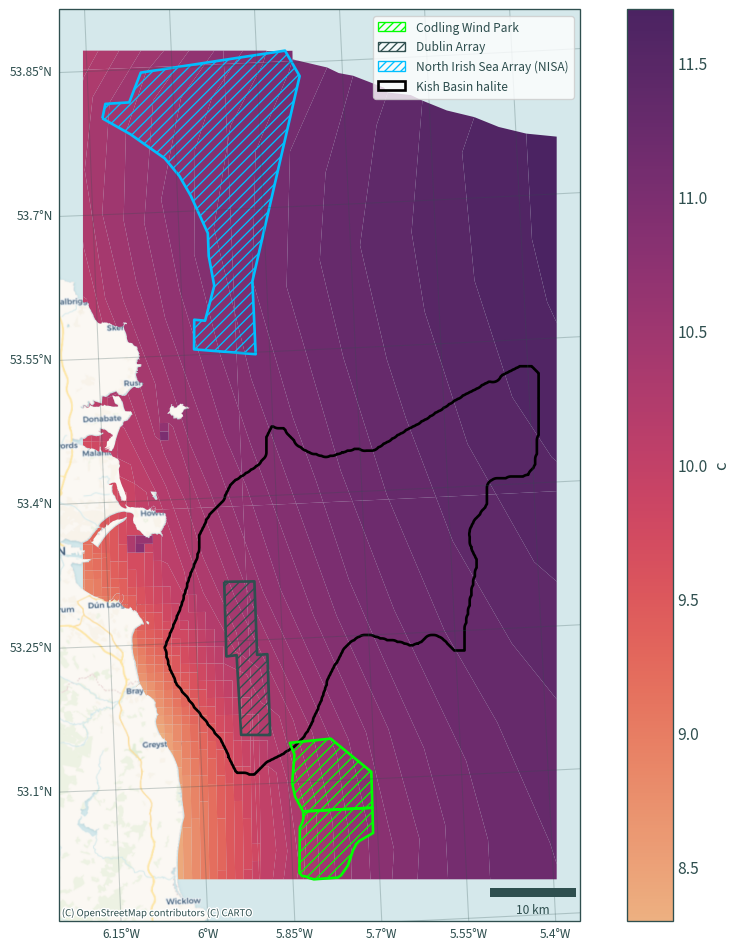

In [21]:
plot_map(weibull_c, "c")

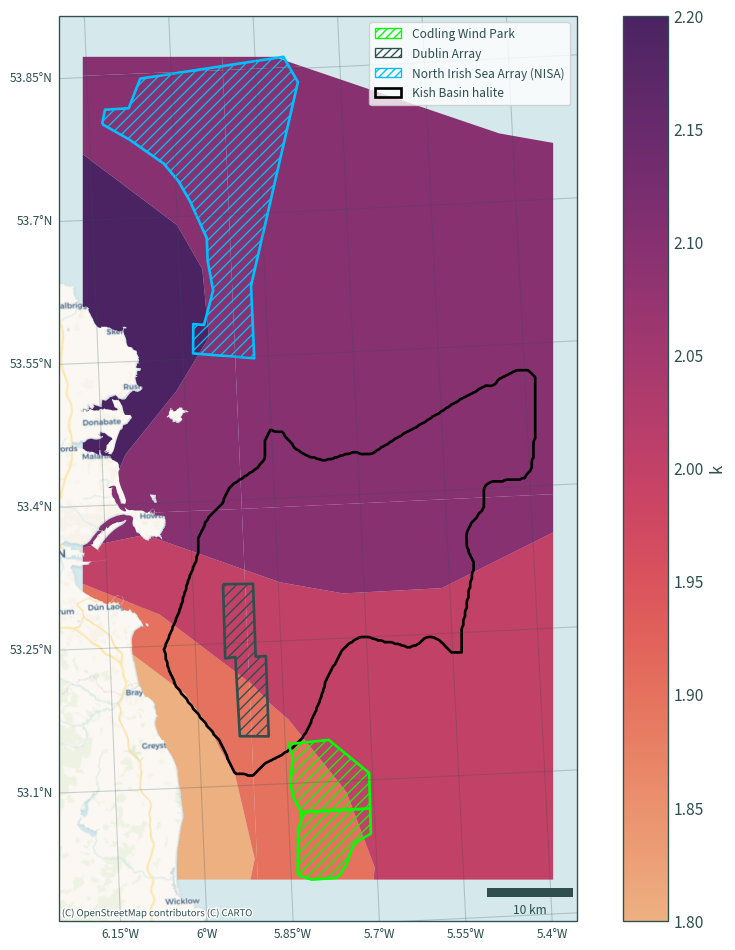

In [22]:
plot_map(weibull_k, "k")

In [32]:
# areas intersecting with wind farms
weibull_c = weibull_c.overlay(wind_farms, how="intersection")
weibull_k = weibull_k.overlay(wind_farms, how="intersection")

In [33]:
# compute c and k over wind farms
weibull_c = wind_farms.dissolve(by="Name_").merge(
    weibull_c.dissolve(by="Name_", aggfunc={"Value": ["min", "max", "mean"]}),
    on="Name_",
)
weibull_k = wind_farms.dissolve(by="Name_").merge(
    weibull_k.dissolve(by="Name_", aggfunc={"Value": ["min", "max", "mean"]}),
    on="Name_",
)

In [34]:
weibull_c[["Name", ("Value", "min"), ("Value", "max"), ("Value", "mean")]]

,Name,"(Value, min)","(Value, max)","(Value, mean)"
Name_,,,,
Codling,Codling Wind Park,10.3,10.8,10.550000
Dublin,Dublin Array,9.9,10.6,10.292857
North,North Irish Sea Array (NISA),10.4,11.1,10.806250


In [35]:
weibull_k[["Name", ("Value", "min"), ("Value", "max"), ("Value", "mean")]]

,Name,"(Value, min)","(Value, max)","(Value, mean)"
Name_,,,,
Codling,Codling Wind Park,1.9,2.0,1.95
Dublin,Dublin Array,1.9,2.0,1.95
North,North Irish Sea Array (NISA),2.1,2.2,2.12
